In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

We have 891 rows and 12 columns in dataset

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are missing values in Age,cabin and Embarked

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='count'>

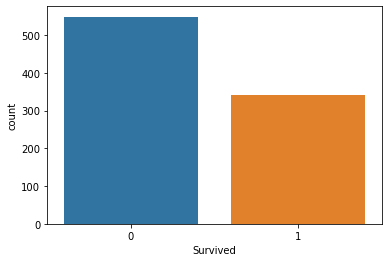

In [10]:
sns.countplot(df['Survived'])

In [11]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Missing value Treatment

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [14]:
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])

In [15]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

NAN value has been replaced by Mean and Mode

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le=LabelEncoder()
for col in df.columns:
    df[col]= le.fit_transform(df[col])

In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,2,108,1,28,1,0,523,18,47,2
1,1,1,0,190,0,52,1,0,596,207,81,0
2,2,1,2,353,0,34,0,0,669,41,47,2
3,3,1,0,272,0,48,1,0,49,189,55,2
4,4,0,2,15,1,48,0,0,472,43,47,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,1,548,1,35,0,0,101,85,47,2
887,887,1,0,303,0,24,0,0,14,153,30,2
888,888,0,2,413,0,39,1,2,675,131,47,2
889,889,1,0,81,1,34,0,0,8,153,60,0


As we have convert categorical data into numerical which will make machine easy to understand

# Skewness

In [20]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.357165
SibSp          2.949902
Parch          2.749117
Ticket         0.000246
Fare           0.366943
Cabin          2.268926
Embarked      -1.264823
dtype: float64

Now train and test the data

In [21]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [22]:
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,2,108,1,28,1,0,523,18,47,2
1,1,0,190,0,52,1,0,596,207,81,0
2,2,2,353,0,34,0,0,669,41,47,2
3,3,0,272,0,48,1,0,49,189,55,2
4,4,2,15,1,48,0,0,472,43,47,2
...,...,...,...,...,...,...,...,...,...,...,...
886,886,1,548,1,35,0,0,101,85,47,2
887,887,0,303,0,24,0,0,14,153,30,2
888,888,2,413,0,39,1,2,675,131,47,2
889,889,0,81,1,34,0,0,8,153,60,0


In [23]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=60)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [27]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(classification_report(y_test,predknn))
print(confusion_matrix(y_test,predknn))

0.6604477611940298
              precision    recall  f1-score   support

           0       0.67      0.83      0.74       157
           1       0.64      0.41      0.50       111

    accuracy                           0.66       268
   macro avg       0.65      0.62      0.62       268
weighted avg       0.66      0.66      0.64       268

[[131  26]
 [ 65  46]]


In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
RFC.score(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.835820895522388
[[143  14]
 [ 30  81]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       157
           1       0.85      0.73      0.79       111

    accuracy                           0.84       268
   macro avg       0.84      0.82      0.83       268
weighted avg       0.84      0.84      0.83       268



In [30]:
from sklearn.svm import SVC

In [31]:
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6343283582089553
[[140  17]
 [ 81  30]]
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       157
           1       0.64      0.27      0.38       111

    accuracy                           0.63       268
   macro avg       0.64      0.58      0.56       268
weighted avg       0.64      0.63      0.59       268



In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7910447761194029
[[130  27]
 [ 29  82]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       157
           1       0.75      0.74      0.75       111

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



Lets check cross validation score for accuracy that the data is predicting good

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
print(cross_val_score(knn,x,y,cv=5).mean())

0.6150963530224092


In [36]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8417550687339149


In [37]:
print(cross_val_score(svc,x,y,cv=5).mean())

0.6734668256857699


In [38]:
print(cross_val_score(dtc,x,y,cv=5).mean())

0.7476617914757392


MY BEST MODEL IS RANDOMFORESTCLASSIFIER

# Hyper parameter tuning

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
parameters={'n_estimators':[100],
           'max_features':['auto','sqrt'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy']}

In [41]:
GCV_RF=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV_RF.fit(x_train,y_train)
GCV_RF.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

In [42]:
RF_mod=RandomForestClassifier(criterion='entropy',max_features='auto',max_depth=6,n_estimators=100)
RF_mod.fit(x_train,y_train)
pred=RF_mod.predict(x_test)
(accuracy_score(y_test,pred))

0.8208955223880597

After doing hyperparameter tunning we got 82%

# AUC ROC CURVE

In [43]:
from sklearn.metrics import plot_roc_curve

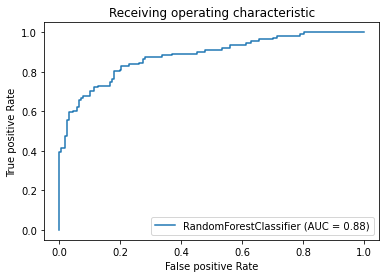

In [44]:
plot_roc_curve(RF_mod,x_test,y_test)
plt.title('Receiving operating characteristic')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.show()

We got AUC score 88

# MODEL SAVING

In [45]:
import pickle

In [46]:
filename='titanic_train.csv.pkl'
pickle.dump(RF_mod,open(filename,'wb'))

In [47]:
import joblib

In [48]:
joblib.dump(RF_mod,'titanic_train.csv2.pkl')

['titanic_train.csv2.pkl']